<a href="https://colab.research.google.com/github/Ishan-DMV/Predictive-Modelling-of-Diabetes-Based-on-Clinical-and-Lifestyle-Parameters/blob/main/Gluco_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Diabetes Prediction

In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
!pip install imbalanced-learn
from imblearn.over_sampling import RandomOverSampler
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

In [ ]:
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Data Mining/Diabetes/Diabetes_2015.csv'
df = pd.read_csv(file_path)

Mounted at /content/drive


In [ ]:
df.head()

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENUM,...,_PAREC1,_PASTAE1,_LMTACT1,_LMTWRK1,_LMTSCL1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
0,1.0,1.0,b'01292015',b'01',b'29',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0
1,1.0,1.0,b'01202015',b'01',b'20',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,2.0,2.0,3.0,3.0,4.0,2.0,2.0,NaN,NaN,2.0
2,1.0,1.0,b'02012015',b'02',b'01',b'2015',1200.0,2.015000e+09,2.015000e+09,1.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,NaN
3,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,9.0
4,1.0,1.0,b'01142015',b'01',b'14',b'2015',1100.0,2.015000e+09,2.015000e+09,1.0,...,4.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1.0


In [ ]:
df.shape

(441456, 330)

#Cleaning the Data


In [ ]:
df.isna().mean().sort_values(ascending=False) * 100

,0
QLSTRES2,100.000000
QLHLTH2,100.000000
PAINACT2,100.000000
QLMENTL2,100.000000
LADULT,99.989806
...,...
_RFSEAT2,0.000000
_RFSEAT3,0.000000
IDATE,0.000000
FMONTH,0.000000


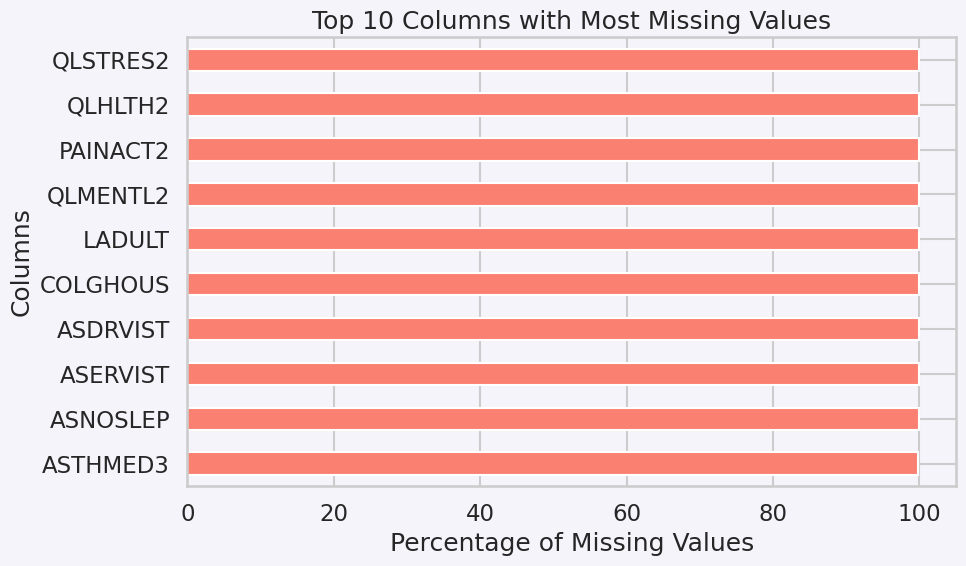

In [ ]:
missing_percent = df.isna().mean().sort_values(ascending=False) * 100

missing_percent.head(10).plot(kind='barh', figsize=(10, 6), color='salmon')
plt.title('Top 10 Columns with Most Missing Values')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Columns')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
threshold = len(df) * 0.7

df_cleaned = df.dropna(axis=1, thresh=threshold)

print("Shape of the cleaned dataframe:", df_cleaned.shape)

Shape of the cleaned dataframe: (441456, 150)


In [ ]:
datatype_counts = df_cleaned.dtypes.value_counts()

print("Count of columns by datatype:")
print(datatype_counts)
df = df_cleaned

Count of columns by datatype:
float64    143
object       7
Name: count, dtype: int64


In [ ]:
object_columns = df.select_dtypes(include=['object']).columns

print("Columns with object data type:")
print(object_columns)

Columns with object data type:
Index(['IDATE', 'IMONTH', 'IDAY', 'IYEAR', 'PCDMDECN', 'EXACTOT1', 'EXACTOT2'], dtype='object')


In [ ]:
df = df.drop(columns=df.select_dtypes(include=['object']).columns)

print("Shape of the cleaned dataframe:", df_cleaned.shape)

Shape of the cleaned dataframe: (441456, 150)


In [ ]:
df = df.dropna()
df.shape

(215827, 143)

In [ ]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

df_sampled = df.sample(frac=0.1, random_state=42)
X = add_constant(df_sampled)

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss


      Feature           VIF
0      _STATE  2.399803e+06
1      FMONTH  1.168061e+00
2    DISPCODE  1.172454e+00
3       SEQNO  2.237258e+12
4        _PSU  2.237258e+12
..        ...           ...
138  _LMTWRK1  1.778047e+00
139  _LMTSCL1  3.830933e+00
140  _RFSEAT2  2.870546e+00
141  _RFSEAT3  3.223061e+00
142  _AIDTST3  5.637089e+01

[143 rows x 2 columns]


In [ ]:
vif_data_sorted = vif_data.sort_values(by="VIF", ascending=False)

print(vif_data_sorted)

      Feature           VIF
107  FRUTDA1_  3.105931e+14
110  ORNGDAY_  9.582127e+13
117  _VEGESUM  2.558863e+13
78   _DRDXAR1  1.857154e+13
108  BEANDAY_  8.839253e+12
..        ...           ...
13   BLOODCHO  0.000000e+00
114  _FRTRESP  0.000000e+00
113  _MISVEGN  0.000000e+00
112  _MISFRTN  0.000000e+00
115  _VEGRESP  0.000000e+00

[143 rows x 2 columns]


In [ ]:
features_to_drop = vif_data[vif_data["VIF"] > 5]["Feature"]

df_cleaned = df_sampled.drop(columns=features_to_drop)

print("Shape of the cleaned dataframe:", df_cleaned.shape)

Shape of the cleaned dataframe: (21583, 77)



Feature Importances:

     Feature  Importance
29   WEIGHT2    0.055753
52   _LLCPWT    0.046039
2    GENHLTH    0.042396
30   HEIGHT3    0.038095
42   FVGREEN    0.037540
27   INCOME2    0.034290
0     FMONTH    0.032292
41   FVBEANS    0.031520
43   FVORANG    0.030344
44  VEGETAB1    0.030176
53   _RFHLTH    0.028446
40    FRUIT1    0.026557
39  FRUITJU1    0.024665
9    BPHIGH4    0.024066
61   _INCOMG    0.022407
48  PNEUVAC3    0.021830
3   PHYSHLTH    0.021008
26   EMPLOY1    0.020182
54  _RFHYPE5    0.018762
73  _LMTSCL1    0.016445
23   MARITAL    0.016382
4   MENTHLTH    0.015302
70  STRFREQ_    0.014302
50  _RAWRAKE    0.014201
35  DIFFWALK    0.013430
45  STRENGTH    0.013338
72  _LMTWRK1    0.013056
51  _DUALUSE    0.011842
56   _RFCHOL    0.011328
11   CHOLCHK    0.010938
12   TOLDHI2    0.010712
24  RENTHOM1    0.010358
47  FLUSHOT6    0.010127
60  _CHLDCNT    0.009711
59   _RFBMI5    0.009645
71  _LMTACT1    0.009257
28  INTERNET    0.009082
8   CHECKUP1    0.009046
46

<ipython-input-51-c2d96d768c9e>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


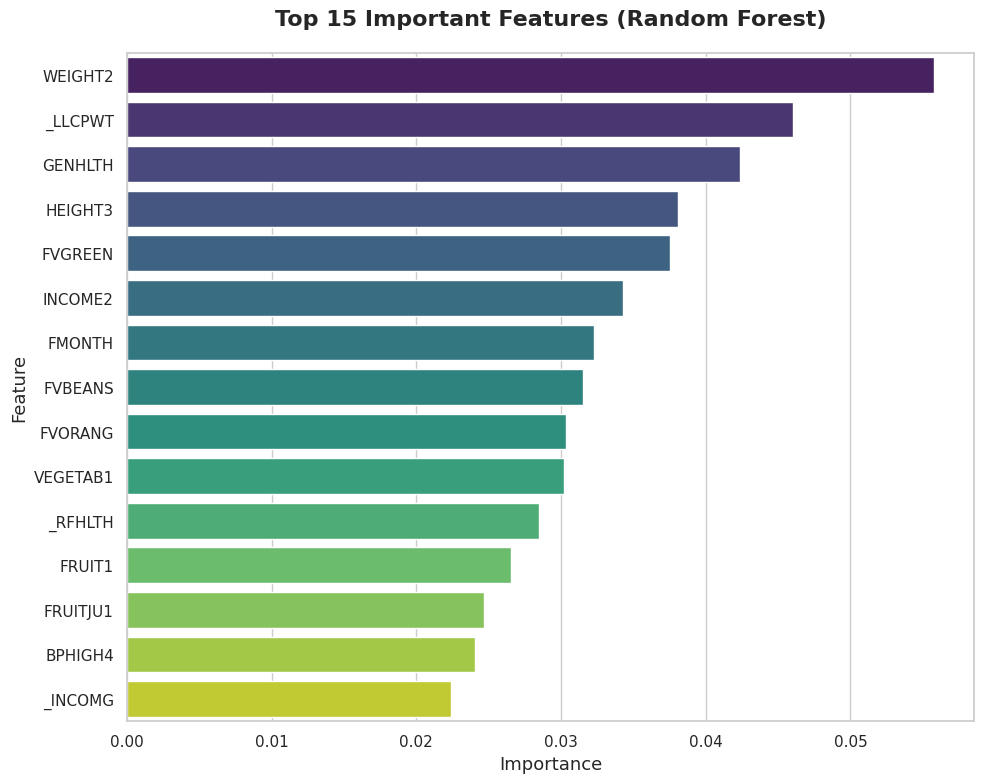


✅ Top 15 features:
 ['WEIGHT2', '_LLCPWT', 'GENHLTH', 'HEIGHT3', 'FVGREEN', 'INCOME2', 'FMONTH', 'FVBEANS', 'FVORANG', 'VEGETAB1', '_RFHLTH', 'FRUIT1', 'FRUITJU1', 'BPHIGH4', '_INCOMG']


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

df_sampled = df_cleaned.sample(frac=0.1, random_state=42)

X = df_sampled.drop(columns=['DIABETE3'])
y = df_sampled['DIABETE3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

pd.set_option('display.max_rows', None)
print("\nFeature Importances:\n")
print(feature_importances)

TOP_N = 15
top_features = feature_importances.head(TOP_N)

sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))
sns.barplot(
    x="Importance",
    y="Feature",
    data=top_features,
    palette="viridis"
)

plt.title(f"Top {TOP_N} Important Features (Random Forest)", fontsize=16, weight='bold', pad=20)
plt.xlabel("Importance", fontsize=13)
plt.ylabel("Feature", fontsize=13)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.tight_layout()
plt.show()

print(f"\n✅ Top {TOP_N} features:\n", top_features['Feature'].to_list())

In [ ]:
df = df[[
    'DIABETE3', '_RFHYPE5', 'TOLDHI2', '_CHOLCHK', '_BMI5', 'SMOKE100',
    'CVDSTRK3', '_MICHD', '_TOTINDA', '_FRTLT1', '_VEGLT1', '_RFDRHV5',
    'HLTHPLN1', 'MEDCOST', 'GENHLTH', 'MENTHLTH', 'PHYSHLTH', 'DIFFWALK',
    'SEX', '_AGEG5YR', 'EDUCA', 'INCOME2',
]]

In [ ]:
#Columns we chose based on studying about the domain are
# 'DIABETE3' - prediction column
# '_RFHYPE5' - Adults who have been told they have high blood pressure by a doctor, nurse, or other health professional,
# 'TOLDHI2' - Have you EVER been told by a doctor, nurse or other health professional that your blood cholesterol is high?,
# '_CHOLCHK' - Cholesterol check within past five years,
# '_BMI5' - Body Mass Index (BMI),++++++++++++++++++++++++
# 'SMOKE100' - Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes],
# 'CVDSTRK3' - (Ever told) you had a stroke.
# '_MICHD' - Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI),
# '_TOTINDA' - Adults who reported doing physical activity or exercise during the past 30 days other than their regular job,
# '_FRTLT1' - Consume Fruit 1 or more times per day
# '_VEGLT1' - Consume Vegetable 1 or more times per day,
# '_RFDRHV5' - Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week),
# 'HLTHPLN1' - Do you have any kind of health care coverage, including health insurance, prepaid plans such as HMOs, or government plans such as Medicare, or Indian Health Service? ,
# 'MEDCOST' - Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? ,
# 'GENHLTH' - Would you say that in general your health is:,
# 'MENTHLTH' - Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good?,
# 'PHYSHLTH' - Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good?
# 'DIFFWALK' - Do you have serious difficulty walking or climbing stairs? ,
# 'SEX' - Indicate sex of respondent.,
# '_AGEG5YR' - Fourteen-level age category,
# 'EDUCA' - What is the highest grade or year of school you completed?,
# 'INCOME2' - Is your annual household income from all sources: (If respondent refuses at any income level, code "Refused.")

In [ ]:
df.shape

(215827, 22)

In [ ]:
df.head()

,DIABETE3,_RFHYPE5,TOLDHI2,_CHOLCHK,_BMI5,SMOKE100,CVDSTRK3,_MICHD,_TOTINDA,_FRTLT1,...,HLTHPLN1,MEDCOST,GENHLTH,MENTHLTH,PHYSHLTH,DIFFWALK,SEX,_AGEG5YR,EDUCA,INCOME2
24809,3.0,1.0,2.0,1.0,2140.0,2.0,7.0,2.0,1.0,1.0,...,1.0,2.0,2.0,4.0,88.0,2.0,2.0,2.0,5.0,5.0
24811,3.0,2.0,1.0,1.0,1958.0,1.0,2.0,2.0,1.0,2.0,...,1.0,2.0,2.0,88.0,88.0,2.0,2.0,11.0,5.0,6.0
24812,3.0,1.0,2.0,1.0,3978.0,2.0,2.0,2.0,1.0,1.0,...,1.0,2.0,2.0,20.0,2.0,2.0,2.0,2.0,6.0,5.0
24814,1.0,1.0,2.0,1.0,4993.0,1.0,2.0,2.0,2.0,1.0,...,1.0,1.0,4.0,88.0,88.0,2.0,2.0,7.0,5.0,6.0
24815,3.0,1.0,2.0,1.0,2114.0,2.0,2.0,2.0,1.0,1.0,...,1.0,2.0,3.0,88.0,88.0,2.0,2.0,2.0,6.0,7.0


In [ ]:
df['DIABETE3'] = df['DIABETE3'].replace({2:0, 3:0, 1:2, 4:1})
df = df[df.DIABETE3 != 7]
df = df[df.DIABETE3 != 9]
df.DIABETE3.unique()

array([0., 2., 1.])

In [ ]:
df['_RFHYPE5'] = df['_RFHYPE5'].replace({1:0, 2:1})
df = df[df._RFHYPE5 != 9]
df._RFHYPE5.unique()

array([0., 1.])

In [ ]:
df['TOLDHI2'] = df['TOLDHI2'].replace({2:0})
df = df[df.TOLDHI2 != 7]
df = df[df.TOLDHI2 != 9]
df.TOLDHI2.unique()

array([0., 1.])

In [ ]:
df['_CHOLCHK'] = df['_CHOLCHK'].replace({3:0,2:0})
df = df[df._CHOLCHK != 9]
df._CHOLCHK.unique()

array([1., 0.])

In [ ]:
df['_BMI5'] = df['_BMI5'].div(100).round(0)
df._BMI5.unique()

array([21., 20., 40., 50., 28., 29., 19., 24., 33., 31., 39., 30., 37.,
       23., 26., 27., 35., 45., 25., 22., 18., 41., 32., 43., 15., 38.,
       49., 16., 42., 51., 34., 44., 47., 17., 36., 14., 61., 56., 46.,
       53., 63., 67., 55., 58., 62., 65., 54., 73., 60., 59., 48., 70.,
       52., 82., 79., 92., 57., 64., 88., 72., 13., 71., 75., 12., 77.,
       74., 66., 87., 89., 84., 81., 95., 83., 98., 91., 68., 86., 76.,
       69., 80., 90.])

In [ ]:
df['SMOKE100'] = df['SMOKE100'].replace({2:0})
df = df[df.SMOKE100 != 7]
df = df[df.SMOKE100 != 9]
df.SMOKE100.unique()

array([0., 1.])

In [ ]:
df['CVDSTRK3'] = df['CVDSTRK3'].replace({2:0})
df = df[df.CVDSTRK3 != 7]
df = df[df.CVDSTRK3 != 9]
df.CVDSTRK3.unique()

array([0., 1.])

In [ ]:
df['_MICHD'] = df['_MICHD'].replace({2: 0})
df._MICHD.unique()

array([0., 1.])

In [ ]:
df['_TOTINDA'] = df['_TOTINDA'].replace({2:0})
df = df[df._TOTINDA != 9]
df._TOTINDA.unique()

array([1., 0.])

In [ ]:
df['_FRTLT1'] = df['_FRTLT1'].replace({2:0})
df = df[df._FRTLT1 != 9]
df._FRTLT1.unique()

array([0., 1.])

In [ ]:
df['_VEGLT1'] = df['_VEGLT1'].replace({2:0})
df = df[df._VEGLT1 != 9]
df._VEGLT1.unique()

array([1., 0.])

In [ ]:
df['_RFDRHV5'] = df['_RFDRHV5'].replace({1:0, 2:1})
df = df[df._RFDRHV5 != 9]
df._RFDRHV5.unique()

array([0., 1.])

In [ ]:
df['HLTHPLN1'] = df['HLTHPLN1'].replace({2:0})
df = df[df.HLTHPLN1 != 7]
df = df[df.HLTHPLN1 != 9]
df.HLTHPLN1.unique()

array([1., 0.])

In [ ]:
df['MEDCOST'] = df['MEDCOST'].replace({2:0})
df = df[df.MEDCOST != 7]
df = df[df.MEDCOST != 9]
df.MEDCOST.unique()

array([0., 1.])

In [ ]:
df = df[df.GENHLTH != 7]
df = df[df.GENHLTH != 9]
df.GENHLTH.unique()

array([2., 4., 3., 1., 5.])

In [ ]:
df['MENTHLTH'] = df['MENTHLTH'].replace({88:0})
df = df[df.MENTHLTH != 77]
df = df[df.MENTHLTH != 99]
df.MENTHLTH.unique()

array([ 0., 20.,  2.,  1.,  4., 15.,  3.,  5.,  6., 30., 10., 14.,  7.,
       25.,  8., 12., 23., 29., 27., 28.,  9., 13., 21., 18., 16., 22.,
       26., 19., 11., 17., 24.])

In [ ]:
df['PHYSHLTH'] = df['PHYSHLTH'].replace({88:0})
df = df[df.PHYSHLTH != 77]
df = df[df.PHYSHLTH != 99]
df.PHYSHLTH.unique()

array([ 0.,  2.,  5., 10.,  3.,  1.,  7., 20., 15., 25., 30., 21., 14.,
        4.,  6.,  9., 12., 16., 28., 18., 11.,  8., 26., 29., 22., 27.,
       13., 17., 23., 24., 19.])

In [ ]:
df['DIFFWALK'] = df['DIFFWALK'].replace({2:0})
df = df[df.DIFFWALK != 7]
df = df[df.DIFFWALK != 9]
df.DIFFWALK.unique()

array([0., 1.])

In [ ]:
df['SEX'] = df['SEX'].replace({2:0})
df.SEX.unique()

array([0., 1.])

In [ ]:
df = df[df._AGEG5YR != 14]
df._AGEG5YR.unique()

array([11.,  2.,  7.,  5.,  3.,  9., 10.,  6.,  4.,  1.,  8., 13., 12.])

In [ ]:
df = df[df.EDUCA != 9]
df.EDUCA.unique()

array([5., 6., 4., 3., 2., 1.])

In [ ]:
df = df[df.INCOME2 != 77]
df = df[df.INCOME2 != 99]
df.INCOME2.unique()

array([6., 5., 7., 8., 2., 3., 1., 4.])

In [ ]:
df.shape

(178528, 22)

In [ ]:
df.head()

,DIABETE3,_RFHYPE5,TOLDHI2,_CHOLCHK,_BMI5,SMOKE100,CVDSTRK3,_MICHD,_TOTINDA,_FRTLT1,...,HLTHPLN1,MEDCOST,GENHLTH,MENTHLTH,PHYSHLTH,DIFFWALK,SEX,_AGEG5YR,EDUCA,INCOME2
24811,0.0,1.0,1.0,1.0,20.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,5.0,6.0
24812,0.0,0.0,0.0,1.0,40.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,20.0,2.0,0.0,0.0,2.0,6.0,5.0
24814,2.0,0.0,0.0,1.0,50.0,1.0,0.0,0.0,0.0,1.0,...,1.0,1.0,4.0,0.0,0.0,0.0,0.0,7.0,5.0,6.0
24815,0.0,0.0,0.0,1.0,21.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,2.0,6.0,7.0
24817,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,5.0,6.0,8.0


In [ ]:
df = df.rename(columns = {'DIABETE3':'Diabetes',
                                         '_RFHYPE5':'HighBP',
                                         'TOLDHI2':'HighChol', '_CHOLCHK':'CholCheck',
                                         '_BMI5':'BMI',
                                         'SMOKE100':'Smoker',
                                         'CVDSTRK3':'Stroke', '_MICHD':'HeartDiseaseorAttack',
                                         '_TOTINDA':'PhysicalActivity',
                                         '_FRTLT1':'Fruits', '_VEGLT1':"Veggies",
                                         '_RFDRHV5':'HighAlcoholConsump',
                                         'HLTHPLN1':'AnyHealthcare', 'MEDCOST':'NoDocDue2Cost',
                                         'GENHLTH':'GenHlth', 'MENTHLTH':'MentHlth', 'PHYSHLTH':'PhysicalHlth', 'DIFFWALK':'DiffWalk',
                                         'SEX':'Sex', '_AGEG5YR':'Age', 'EDUCA':'Education', 'INCOME2':'Income' })

In [ ]:
df.groupby(['Diabetes']).size()

,0
Diabetes,
0.0,150696
1.0,3220
2.0,24612


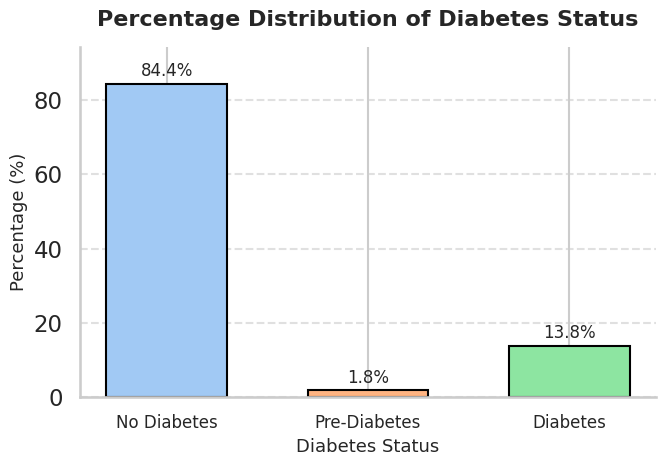

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

diabetes_counts = df.groupby(['Diabetes']).size()
diabetes_percentage = (diabetes_counts / diabetes_counts.sum()) * 100

sns.set(style='whitegrid', context='talk')

fig, ax = plt.subplots(figsize=(7, 5))
colors = sns.color_palette("pastel")

bars = ax.bar(diabetes_percentage.index.astype(str), diabetes_percentage.values,
              color=colors, edgecolor='black', width=0.6)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, height + 1, f'{height:.1f}%',
            ha='center', va='bottom', fontsize=12, fontweight='medium')

ax.set_xlabel('Diabetes Status', fontsize=13)
ax.set_ylabel('Percentage (%)', fontsize=13)
ax.set_title('Percentage Distribution of Diabetes Status', fontsize=16, fontweight='bold', pad=15)
ax.set_xticks(range(len(diabetes_percentage)))

custom_labels = ['No Diabetes', 'Pre-Diabetes', 'Diabetes']
ax.set_xticklabels(custom_labels[:len(diabetes_percentage)], fontsize=12)

ax.set_ylim(0, diabetes_percentage.max() + 10)
ax.yaxis.grid(True, linestyle='--', alpha=0.6)
sns.despine()
plt.tight_layout()
plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE

X = df.drop('Diabetes', axis=1)
y = df['Diabetes']

smote = SMOTE(sampling_strategy='auto', random_state=42)

X_resampled, y_resampled = smote.fit_resample(X, y)

df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Diabetes'] = y_resampled

print(df_resampled['Diabetes'].value_counts())
df = df_resampled

Diabetes
0.0    150696
2.0    150696
1.0    150696
Name: count, dtype: int64


# EDA

<ipython-input-49-2ecce5fa7beb>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  p = sns.boxplot(


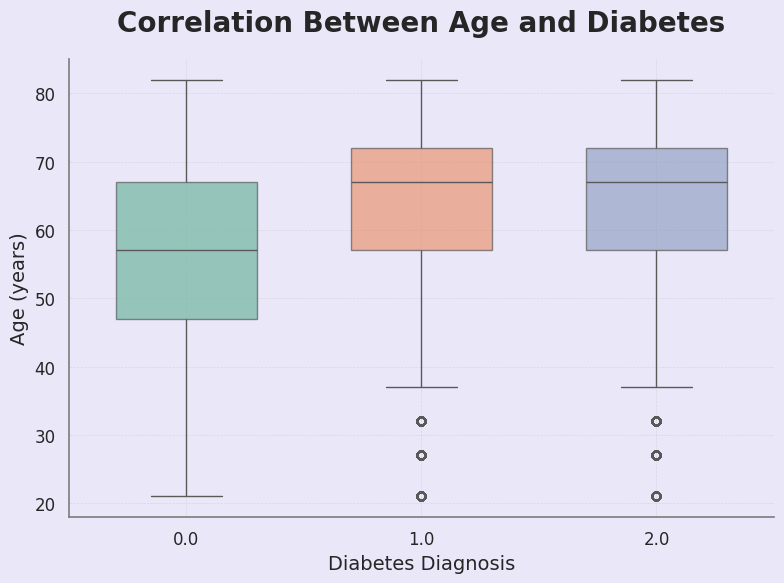

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

age_map = {
    1: 21, 2: 27, 3: 32, 4: 37, 5: 42, 6: 47, 7: 52,
    8: 57, 9: 62, 10: 67, 11: 72, 12: 77, 13: 82
}
df['Age_actual'] = df['Age'].map(age_map)

sns.set_theme(style="whitegrid", rc={
    "axes.facecolor": "#EAE7F9",
    "figure.facecolor": "#EAE7F9",
    "axes.edgecolor": "gray"
})

plt.figure(figsize=(8, 6))
p = sns.boxplot(
    x="Diabetes",
    y="Age_actual",
    data=df_resampled,
    palette="Set2",
    width=0.6,
    boxprops=dict(alpha=0.7)
)

plt.title("Correlation Between Age and Diabetes", fontsize=20, weight='bold', pad=20)
plt.xlabel("Diabetes Diagnosis", fontsize=14)
plt.ylabel("Age (years)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

sns.despine()

plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)

plt.tight_layout()
plt.show()

In [ ]:
df.drop('Age_actual', axis=1, inplace=True)

<ipython-input-52-52b6adc9c6d6>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='Diabetes', y='BMI', data=df, palette="coolwarm", linewidth=1.5, width=0.6, fliersize=4)
<ipython-input-52-52b6adc9c6d6>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['No Diabetes', 'Pre-Diabetes', 'Diabetes'], fontsize=12)


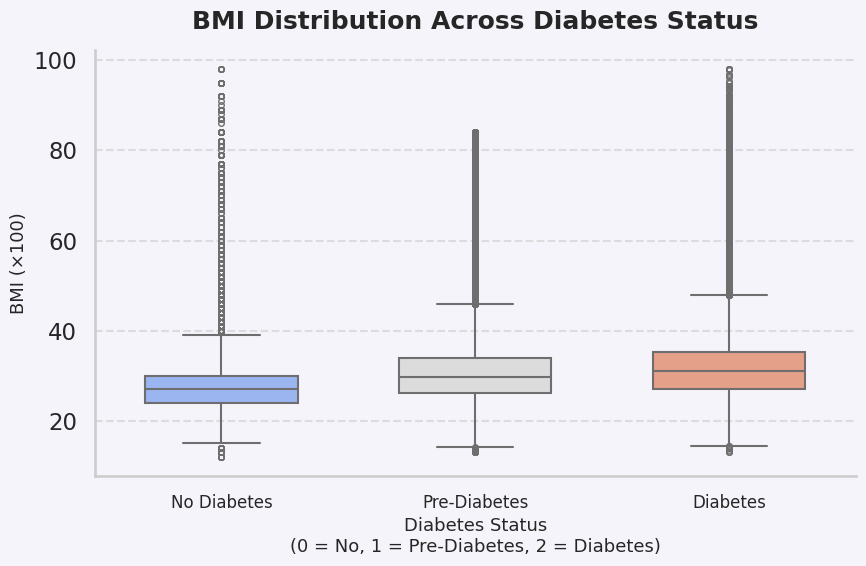

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", context="talk", rc={"axes.facecolor":"#F6F4FB", "figure.facecolor":"#F6F4FB"})

plt.figure(figsize=(9, 6))

ax = sns.boxplot(x='Diabetes', y='BMI', data=df, palette="coolwarm", linewidth=1.5, width=0.6, fliersize=4)

plt.title("BMI Distribution Across Diabetes Status", fontsize=18, fontweight='bold', pad=15)
plt.xlabel("Diabetes Status\n(0 = No, 1 = Pre-Diabetes, 2 = Diabetes)", fontsize=13)
plt.ylabel("BMI (×100)", fontsize=13)

ax.set_xticklabels(['No Diabetes', 'Pre-Diabetes', 'Diabetes'], fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.6)
sns.despine()
plt.tight_layout()
plt.show()

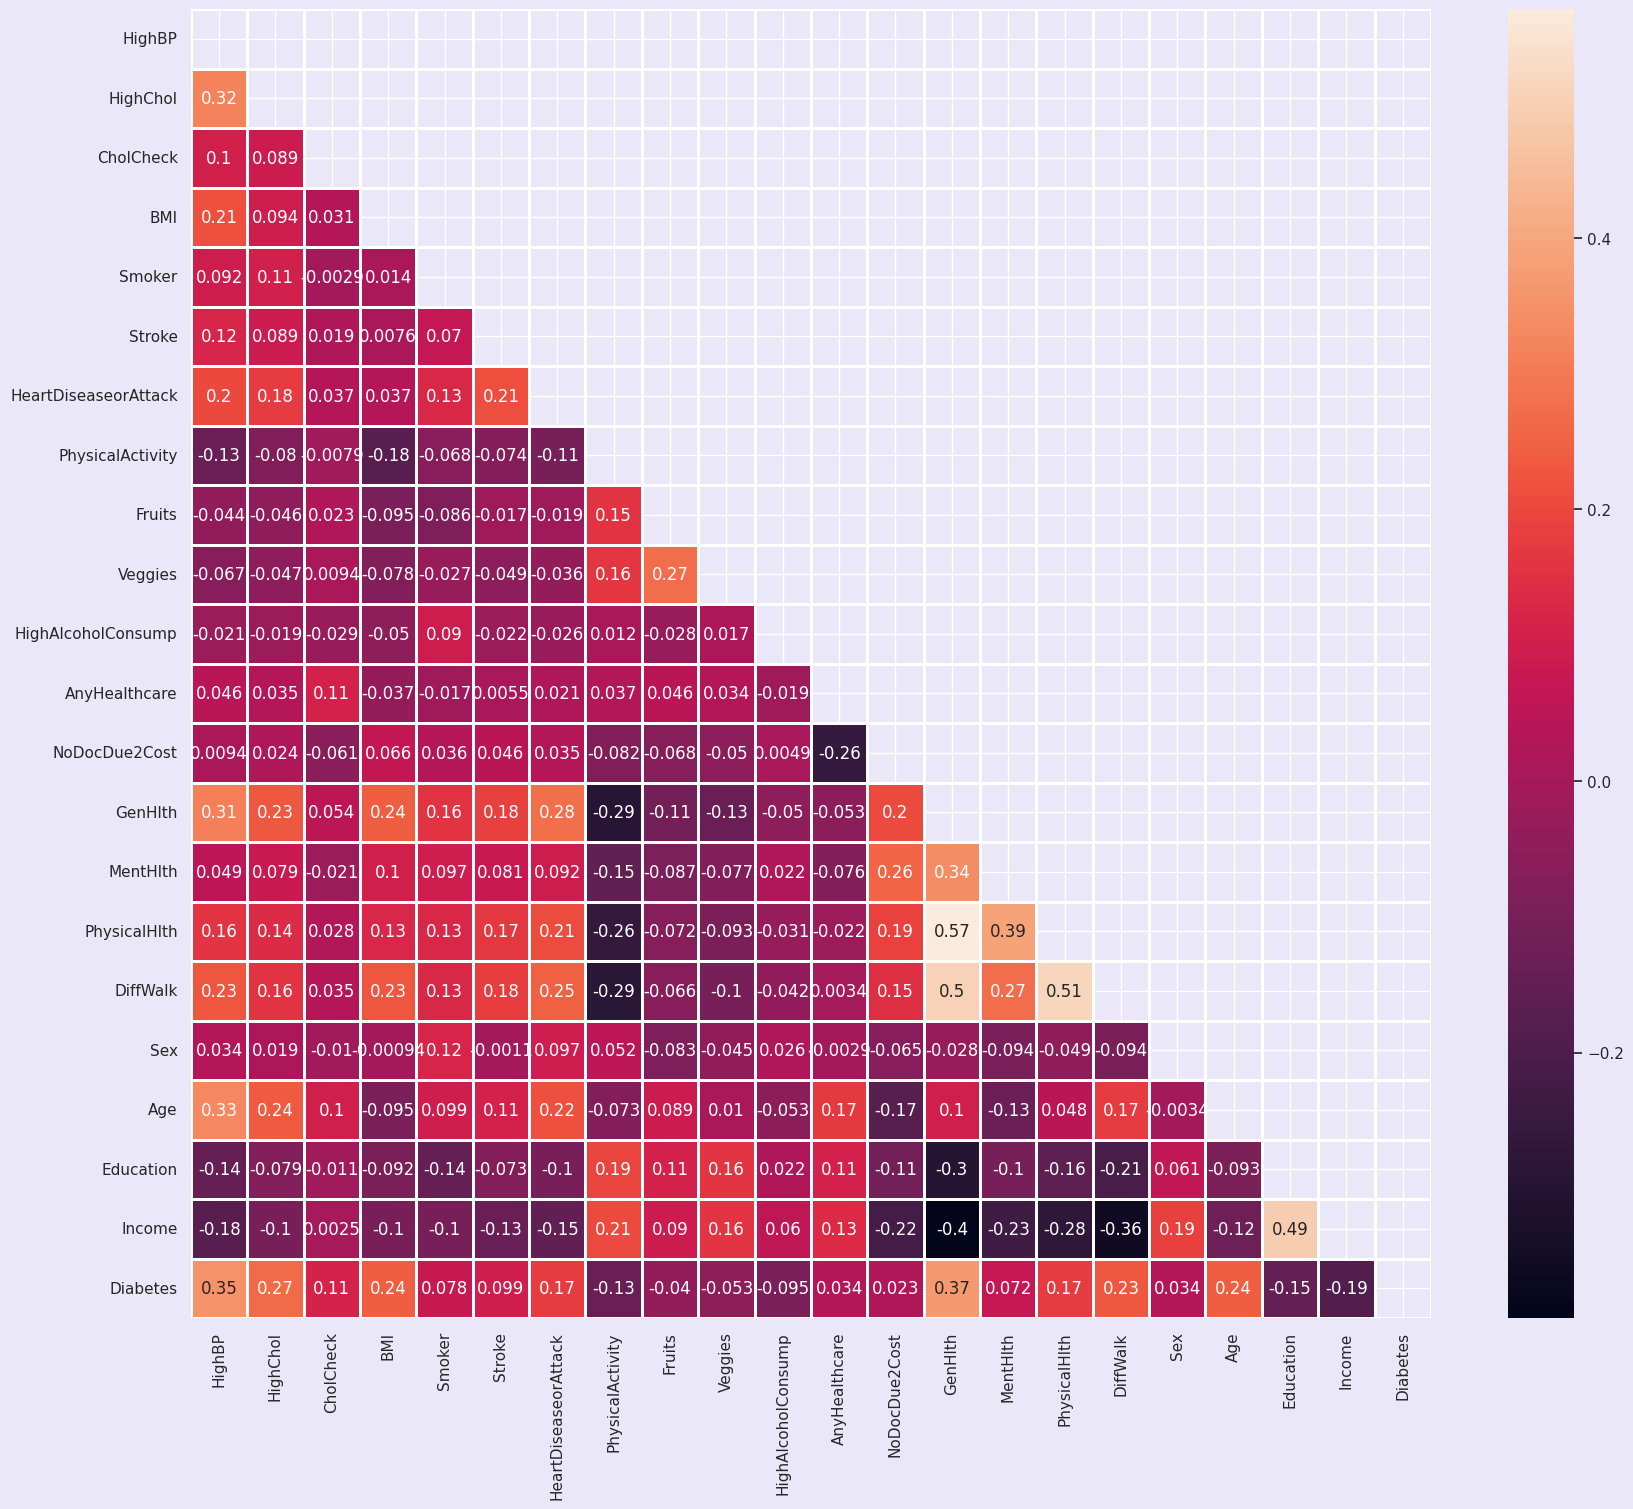

In [ ]:
import numpy as np

plt.figure(figsize=(20, 17))
matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, linewidth=.8, mask=matrix, cmap="rocket");

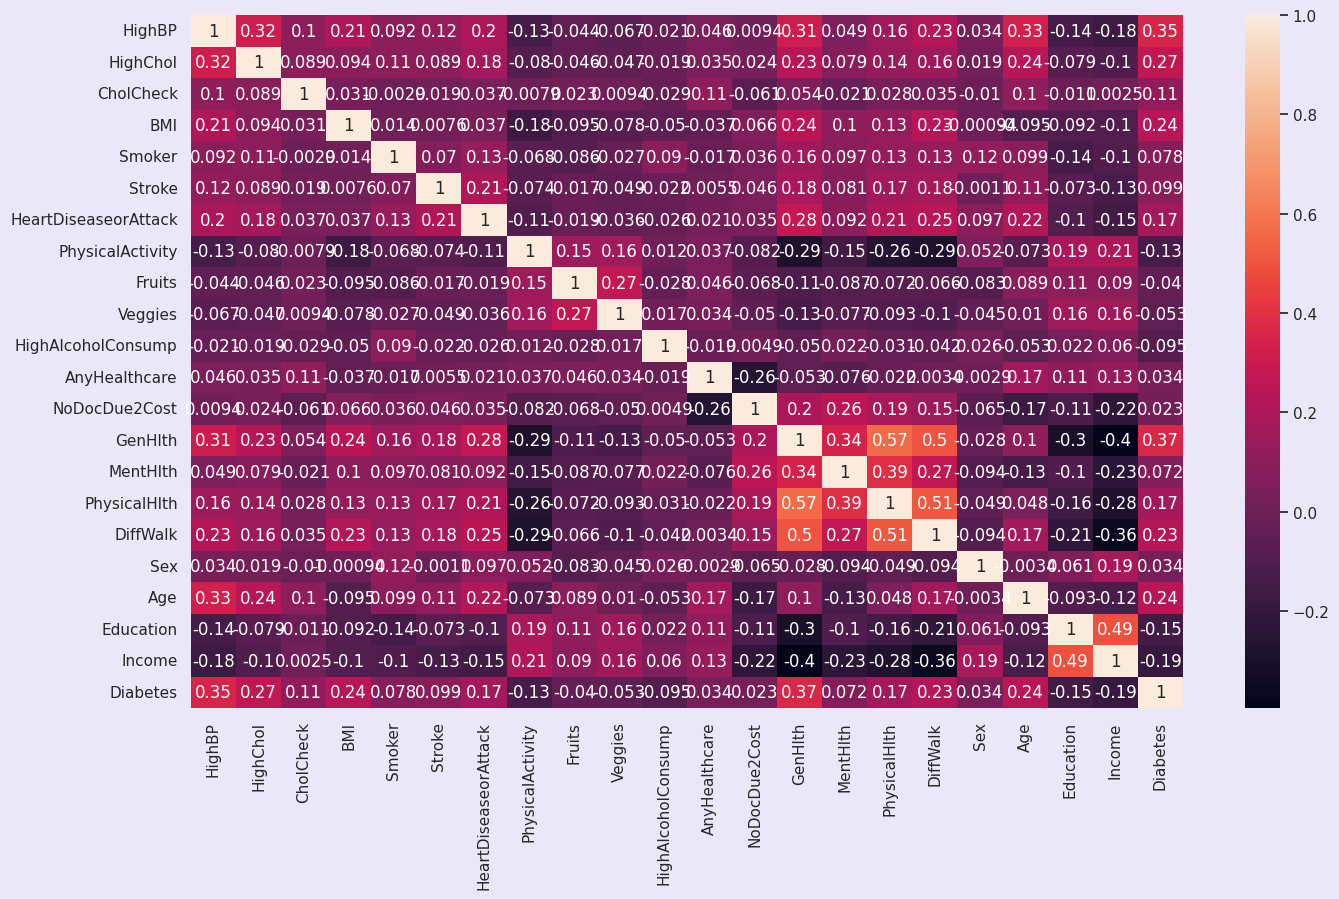

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(df_resampled.corr(), annot=True);

In [ ]:
hig_corr = df.corr()
hig_corr_features = hig_corr.index[abs(hig_corr["Diabetes"]) >= 0.2]
hig_corr_features

Index(['HighBP', 'HighChol', 'BMI', 'GenHlth', 'DiffWalk', 'Age', 'Diabetes'], dtype='object')

# Model

In [ ]:
X = df.drop('Diabetes', axis=1)
y = df['Diabetes']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

log_reg = LogisticRegression()

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores = []
conf_matrices = []
class_reports = []

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    log_reg.fit(X_train, y_train)

    y_pred = log_reg.predict(X_test)

    accuracy_scores.append(log_reg.score(X_test, y_test))
    conf_matrices.append(confusion_matrix(y_test, y_pred))
    class_reports.append(classification_report(y_test, y_pred))
    log_reg_acc = np.mean(accuracy_scores)

print(f"Logistic Regression Cross-validation Accuracy: {np.mean(accuracy_scores):.4f}")
print(f"Standard deviation of accuracy: {np.std(accuracy_scores):.4f}")
print("Confusion Matrix (last fold):")
print(conf_matrices[-1])
print("Classification Report (last fold):")
print(class_reports[-1])

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Logistic Regression Cross-validation Accuracy: 0.5199
Standard deviation of accuracy: 0.0016
Confusion Matrix (last fold):
[[19291  5365  5483]
 [ 8360  9898 11881]
 [ 5158  7364 17617]]
Classification Report (last fold):
              precision    recall  f1-score   support

         0.0       0.59      0.64      0.61     30139
         1.0       0.44      0.33      0.38     30139
         2.0       0.50      0.58      0.54     30139

    accuracy                           0.52     90417
   macro avg       0.51      0.52      0.51     90417
weighted avg       0.51      0.52      0.51     90417



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

knn = KNeighborsClassifier(n_neighbors=5)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores = []
conf_matrices = []
class_reports = []

for train_index, test_index in kf.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    accuracy_scores.append(knn.score(X_test, y_test))
    conf_matrices.append(confusion_matrix(y_test, y_pred))
    class_reports.append(classification_report(y_test, y_pred))
    knn_acc = np.mean(accuracy_scores)

print(f"KNN Cross-validation Accuracy: {np.mean(accuracy_scores):.4f}")
print(f"Standard deviation of accuracy: {np.std(accuracy_scores):.4f}")
print("Confusion Matrix (last fold):")
print(conf_matrices[-1])
print("Classification Report (last fold):")
print(class_reports[-1])

KNN Cross-validation Accuracy: 0.8756
Standard deviation of accuracy: 0.0012
Confusion Matrix (last fold):
[[23331  1560  5248]
 [   61 30011    67]
 [ 2544  1974 25621]]
Classification Report (last fold):
              precision    recall  f1-score   support

         0.0       0.90      0.77      0.83     30139
         1.0       0.89      1.00      0.94     30139
         2.0       0.83      0.85      0.84     30139

    accuracy                           0.87     90417
   macro avg       0.87      0.87      0.87     90417
weighted avg       0.87      0.87      0.87     90417



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

rand_clf = RandomForestClassifier(criterion='entropy', max_depth=15, max_features=0.75,
                                  min_samples_leaf=2, min_samples_split=3, n_estimators=130)

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores = []
conf_matrices = []
class_reports = []

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    rand_clf.fit(X_train, y_train)

    y_pred = rand_clf.predict(X_test)

    accuracy_scores.append(rand_clf.score(X_test, y_test))
    conf_matrices.append(confusion_matrix(y_test, y_pred))
    class_reports.append(classification_report(y_test, y_pred))
    rand_acc = np.mean(accuracy_scores)

print(f"Random Forest Cross-validation Accuracy: {np.mean(accuracy_scores):.4f}")
print(f"Standard deviation of accuracy: {np.std(accuracy_scores):.4f}")
print("Confusion Matrix (last fold):")
print(conf_matrices[-1])
print("Classification Report (last fold):")
print(class_reports[-1])

Random Forest Cross-validation Accuracy: 0.8540
Standard deviation of accuracy: 0.0009
Confusion Matrix (last fold):
[[27801     3  2335]
 [  755 26759  2625]
 [ 3917  3443 22779]]
Classification Report (last fold):
              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89     30139
         1.0       0.89      0.89      0.89     30139
         2.0       0.82      0.76      0.79     30139

    accuracy                           0.86     90417
   macro avg       0.85      0.86      0.85     90417
weighted avg       0.85      0.86      0.85     90417



In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

xgb = XGBClassifier(objective='binary:logistic', learning_rate=0.01, max_depth=10, n_estimators=180)

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores = []
conf_matrices = []
class_reports = []

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    xgb.fit(X_train, y_train)

    y_pred = xgb.predict(X_test)

    accuracy_scores.append(xgb.score(X_test, y_test))
    conf_matrices.append(confusion_matrix(y_test, y_pred))
    class_reports.append(classification_report(y_test, y_pred))
    xgb_acc = np.mean(accuracy_scores)

print(f"XGBoost Cross-validation Accuracy: {np.mean(accuracy_scores):.4f}")
print(f"Standard deviation of accuracy: {np.std(accuracy_scores):.4f}")
print("Confusion Matrix (last fold):")
print(conf_matrices[-1])
print("Classification Report (last fold):")
print(class_reports[-1])

XGBoost Cross-validation Accuracy: 0.7792
Standard deviation of accuracy: 0.0017
Confusion Matrix (last fold):
[[26585     2  3552]
 [ 1372 24809  3958]
 [ 3753  7371 19015]]
Classification Report (last fold):
              precision    recall  f1-score   support

         0.0       0.84      0.88      0.86     30139
         1.0       0.77      0.82      0.80     30139
         2.0       0.72      0.63      0.67     30139

    accuracy                           0.78     90417
   macro avg       0.78      0.78      0.78     90417
weighted avg       0.78      0.78      0.78     90417



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                               n_estimators=50, learning_rate=1.0)

kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracy_scores = []
conf_matrices = []
class_reports = []

for train_index, test_index in kf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    ada_boost.fit(X_train, y_train)

    y_pred = ada_boost.predict(X_test)

    accuracy_scores.append(ada_boost.score(X_test, y_test))
    conf_matrices.append(confusion_matrix(y_test, y_pred))
    class_reports.append(classification_report(y_test, y_pred))
    ada_acc = np.mean(accuracy_scores)

print(f"AdaBoost Cross-validation Accuracy: {np.mean(accuracy_scores):.4f}")
print(f"Standard deviation of accuracy: {np.std(accuracy_scores):.4f}")
print("Confusion Matrix (last fold):")
print(conf_matrices[-1])
print("Classification Report (last fold):")
print(class_reports[-1])

AdaBoost Cross-validation Accuracy: 0.6484
Standard deviation of accuracy: 0.0052
Confusion Matrix (last fold):
[[24117   124  5898]
 [ 2186 15992 11961]
 [ 3192  8212 18735]]
Classification Report (last fold):
              precision    recall  f1-score   support

         0.0       0.82      0.80      0.81     30139
         1.0       0.66      0.53      0.59     30139
         2.0       0.51      0.62      0.56     30139

    accuracy                           0.65     90417
   macro avg       0.66      0.65      0.65     90417
weighted avg       0.66      0.65      0.65     90417



In [ ]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN',  'Random Forest Classifier', 'XgBoost', 'Adaboost'],
    'Score': [100*round(log_reg_acc,4), 100*round(knn_acc,4), 100*round(rand_acc,4), 100*round(xgb_acc,4), 100*round(ada_acc,4)]
})
models.sort_values(by = 'Score', ascending = False)

,Model,Score
1,KNN,87.56
2,Random Forest Classifier,85.40
3,XgBoost,77.92
4,Adaboost,64.84
0,Logistic Regression,51.99


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


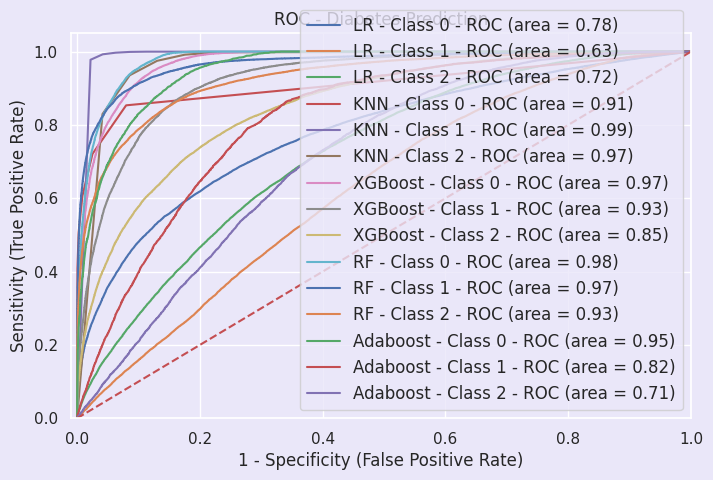

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))

models = [
    {
        'label': 'LR',
        'model': log_reg,
    },
    {
        'label': 'KNN',
        'model': knn,
    },
    {
        'label': 'XGBoost',
        'model': xgb,
    },
    {
        'label': 'RF',
        'model': rand_clf,
    },
    {
        'label': 'Adaboost',
        'model': ada_boost,
    }
]

for m in models:
    model = m['model']
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    y_prob = model.predict_proba(X_test)
    n_classes = y_prob.shape[1]

    for i in range(n_classes):
        fpr, tpr, thresholds = metrics.roc_curve(y_test == i, y_prob[:, i])
        auc = metrics.roc_auc_score(y_test == i, y_prob[:, i])
        plt.plot(fpr, tpr, label='%s - Class %d - ROC (area = %0.2f)' % (m['label'], i, auc))

plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.01, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)', fontsize=12)
plt.ylabel('Sensitivity (True Positive Rate)', fontsize=12)
plt.title('ROC - Diabetes Prediction', fontsize=12)
plt.legend(loc="lower right", fontsize=12)
plt.savefig("roc_diabetes.jpeg", format='jpeg', dpi=400, bbox_inches='tight')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_train_onehot = to_categorical(y_train, num_classes=3)
y_test_onehot = to_categorical(y_test, num_classes=3)

model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy', 'AUC'])

history = model.fit(X_train_scaled, y_train_onehot, epochs=100, batch_size=16, validation_split=0.1, verbose=2)

y_pred_proba = model.predict(X_test_scaled)

auc_score = roc_auc_score(y_test_onehot, y_pred_proba, average='macro', multi_class='ovr')

y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, np.argmax(y_pred, axis=1))

print("MLP AUC Score:", auc_score)
print("MLP Accuracy:", accuracy)

mlp_auc = auc_score * 100
mlp_accuracy = accuracy * 100

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
20344/20344 - 56s - 3ms/step - AUC: 0.7816 - accuracy: 0.5877 - loss: 0.8659 - val_AUC: 0.5760 - val_accuracy: 0.3000 - val_loss: 1.0981
Epoch 2/100
20344/20344 - 80s - 4ms/step - AUC: 0.8237 - accuracy: 0.6367 - loss: 0.7872 - val_AUC: 0.6247 - val_accuracy: 0.3466 - val_loss: 1.0266
Epoch 3/100
20344/20344 - 54s - 3ms/step - AUC: 0.8333 - accuracy: 0.6478 - loss: 0.7668 - val_AUC: 0.5325 - val_accuracy: 0.1874 - val_loss: 1.1212
Epoch 4/100
20344/20344 - 81s - 4ms/step - AUC: 0.8378 - accuracy: 0.6537 - loss: 0.7566 - val_AUC: 0.5394 - val_accuracy: 0.2100 - val_loss: 1.1259
Epoch 5/100
20344/20344 - 86s - 4ms/step - AUC: 0.8408 - accuracy: 0.6575 - loss: 0.7497 - val_AUC: 0.5921 - val_accuracy: 0.3075 - val_loss: 1.0744
Epoch 6/100
20344/20344 - 79s - 4ms/step - AUC: 0.8429 - accuracy: 0.6588 - loss: 0.7449 - val_AUC: 0.6193 - val_accuracy: 0.3484 - val_loss: 1.0428
Epoch 7/100
20344/20344 - 80s - 4ms/step - AUC: 0.8441 - accuracy: 0.6605 - loss: 0.7419 - val_AUC: 0.5929

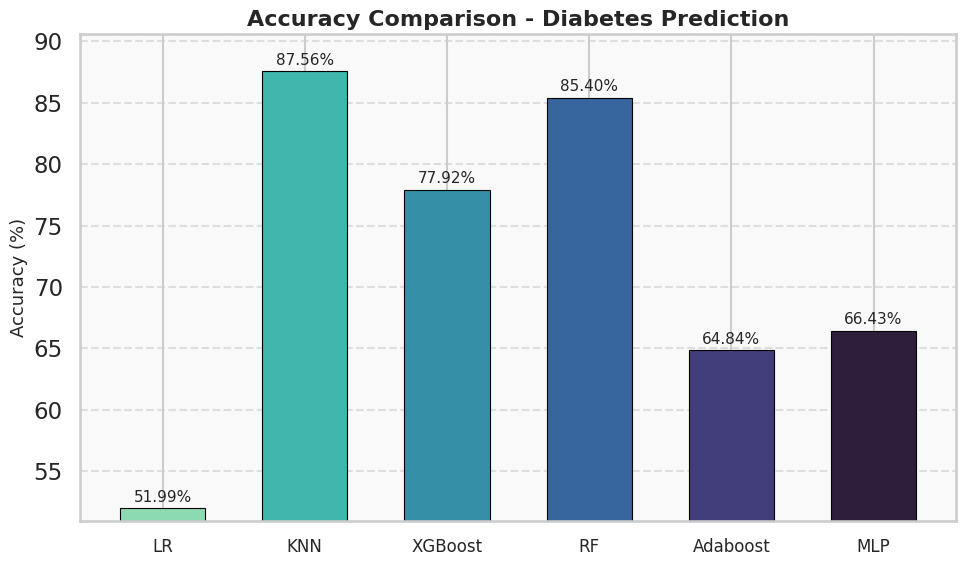

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', context='talk')

models = [
    {'label': 'LR', 'accuracy': log_reg_acc * 100},
    {'label': 'KNN', 'accuracy': knn_acc * 100},
    {'label': 'XGBoost', 'accuracy': xgb_acc * 100},
    {'label': 'RF', 'accuracy': rand_acc * 100},
    {'label': 'Adaboost', 'accuracy': ada_acc * 100},
    {'label': 'MLP', 'accuracy': mlp_accuracy}
]

means_accuracy = [round(model['accuracy'], 2) for model in models]
labels = [model['label'] for model in models]

fig, ax = plt.subplots(figsize=(10, 6))
index = np.arange(len(models))
bar_width = 0.6

colors = sns.color_palette("mako_r", len(models))
bars = ax.bar(index, means_accuracy, bar_width, color=colors, edgecolor='black', linewidth=0.8)

for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2.0, height + 0.3, f'{height:.2f}%',
            ha='center', va='bottom', fontsize=11, fontweight='medium')

ax.set_title('Accuracy Comparison - Diabetes Prediction', fontsize=16, fontweight='bold')
ax.set_xticks(index)
ax.set_xticklabels(labels, fontsize=12)
ax.set_ylabel('Accuracy (%)', fontsize=13)
ax.set_ylim([min(means_accuracy) - 1, max(means_accuracy) + 3])
ax.yaxis.grid(True, linestyle='--', alpha=0.6)

ax.set_facecolor('#f9f9f9')
plt.tight_layout()
plt.show()

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt

models_with_objects = [
    {'label': 'LR', 'model': log_reg},
    {'label': 'KNN', 'model': knn},
    {'label': 'XGBoost', 'model': xgb},
    {'label': 'RF', 'model': rand_clf},
    {'label': 'Adaboost', 'model': ada_boost}
]

prediction_times = []

for m in models_with_objects:
    label = m['label']
    model = m['model']

    start = time.time()
    _ = model.predict(X_test)
    end = time.time()

    time_taken = (end - start) * 1000
    prediction_times.append({'label': label, 'time': time_taken})

start = time.time()
_ = model.predict(X_test_scaled)
end = time.time()
mlp_time = (end - start) * 1000
prediction_times.append({'label': 'MLP', 'time': mlp_time})

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(


Prediction time for LR: 43.047 ms
Prediction time for KNN: 247919.242 ms
Prediction time for XGBoost: 3385.200 ms
Prediction time for RF: 3058.614 ms
Prediction time for Adaboost: 551.928 ms
Prediction time for MLP: 548.770 ms


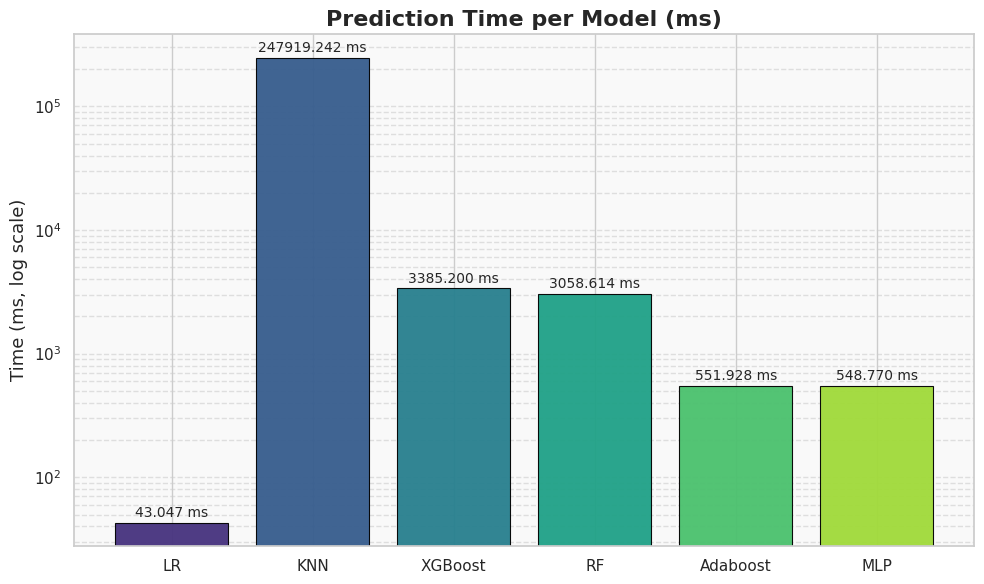

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', context='notebook')

labels = [entry['label'] for entry in prediction_times]
times = [entry['time'] for entry in prediction_times]

for label, time_val in zip(labels, times):
    print(f"Prediction time for {label}: {time_val:.3f} ms")

palette = sns.color_palette("viridis", len(labels))

plt.figure(figsize=(10, 6))
bars = plt.bar(labels, times, color=palette, alpha=0.95, edgecolor='black', linewidth=0.8)

for bar, time_val in zip(bars, times):
    plt.text(bar.get_x() + bar.get_width()/2, time_val * 1.05,
             f'{time_val:.3f} ms', ha='center', va='bottom', fontsize=10, fontweight='medium')

plt.title('Prediction Time per Model (ms)', fontsize=16, fontweight='bold')
plt.ylabel('Time (ms, log scale)', fontsize=13)
plt.yscale('log')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.6, which='both')

plt.gca().set_facecolor('#f9f9f9')
plt.tight_layout()
plt.show()
